In [ ]:
import pandas as pd

In [ ]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 52.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 19.2 MB/s eta 0:00:00


In [ ]:
from datasets import load_dataset

dataset = load_dataset('tatoeba', 'fr-ru')

Generating train split:   0%|          | 0/195161 [00:00<?, ? examples/s]

Dataset tatoeba downloaded and prepared to /root/.cache/huggingface/datasets/tatoeba/fr-ru/2021.7.22/b3ea9c6bb2af47699c5fc0a155643f5a0da287c7095ea14824ee0a8afd74daf6. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
import pandas as pd

data_dict = dataset['train'].to_dict()
df = pd.DataFrame.from_dict(data_dict['translation'])

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 87.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 116.7 MB/s eta 0:00:00


In [ ]:
df['fr'][0]

'Pour une fois dans ma vie je fais un bon geste... Et ça ne sert à rien.'

In [ ]:
!pip install bertviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.6/157.6 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 68.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 106.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 12.3 MB/s eta 0:00:00


In [ ]:
df.iloc[15]

fr    Je ne sais pas.
ru         Я не знаю.
Name: 15, dtype: object

In [ ]:
from transformers import MarianTokenizer, MarianMTModel
import os

tokenizer = MarianTokenizer.from_pretrained("Helsinki-NLP/opus-mt-fr-ru")
model = MarianMTModel.from_pretrained("Helsinki-NLP/opus-mt-fr-ru", output_attentions=True)
id = 15

encoder_input_ids = tokenizer(df['fr'][id], return_tensors="pt", add_special_tokens=True).input_ids
decoder_input_ids = tokenizer(text_target=df['ru'][id], return_tensors="pt", add_special_tokens=True).input_ids

outputs = model(input_ids=encoder_input_ids, decoder_input_ids=decoder_input_ids)

encoder_text = tokenizer.convert_ids_to_tokens(encoder_input_ids[0])
decoder_text = tokenizer.convert_ids_to_tokens(decoder_input_ids[0])

from bertviz import model_view
model_view(
    encoder_attention=outputs.encoder_attentions,
    decoder_attention=outputs.decoder_attentions,
    cross_attention=tuple(t * (t >= 0.25) for t in outputs.cross_attentions),
    encoder_tokens=encoder_text,
    decoder_tokens=decoder_text
)

<IPython.core.display.Javascript object>

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import torch
thresholds = [0.025, 0.05, 0.1, 0.25, 0.5, 0.75]

def my_draw(G):
    pos = nx.circular_layout(G)
    nx.draw(G, pos)
    node_labels = nx.get_node_attributes(G, 'token')
    nx.draw_networkx_labels(G, pos, labels=node_labels)
    plt.show()

In [ ]:
df['ru'][id]

'Один раз в жизни я делаю хорошее дело... И оно бесполезно.'

In [ ]:
import numpy as np

In [ ]:
encoder_input_ids = tokenizer(df['fr'][id], return_tensors="pt", add_special_tokens=True).input_ids
enc_tokens = tokenizer.convert_ids_to_tokens(encoder_input_ids[0])

decoder_input_ids = tokenizer(text_target=df['ru'][id], return_tensors="pt", add_special_tokens=True).input_ids
dec_tokens = tokenizer.convert_ids_to_tokens(decoder_input_ids[0])

ids = torch.cat((encoder_input_ids[0], decoder_input_ids[0]), 0)

In [ ]:
ids

tensor([  511,    42,   666,    32,   705,   582,   166,  2332,    37,  1306,
        36334,   108,   455,   340,    72, 11548,    17,  1299,     3,     0,
         5871,   492,    10,   892,   126,  1268,   225, 23997,  2143,   108,
          219,  1523, 46437,     3,     0])

layer №0, head №0
0.025


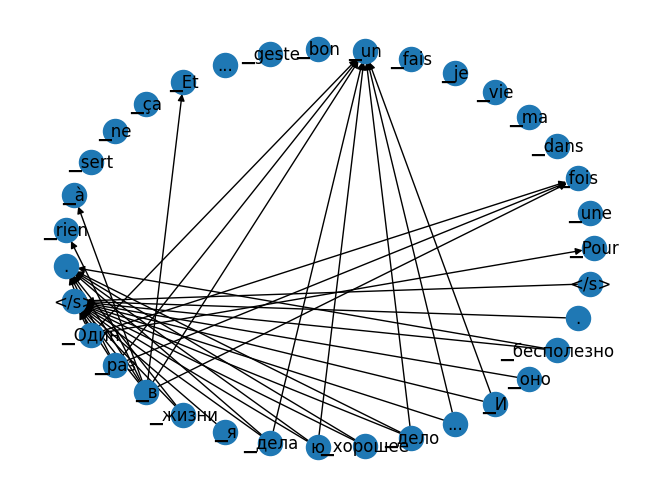

0.05


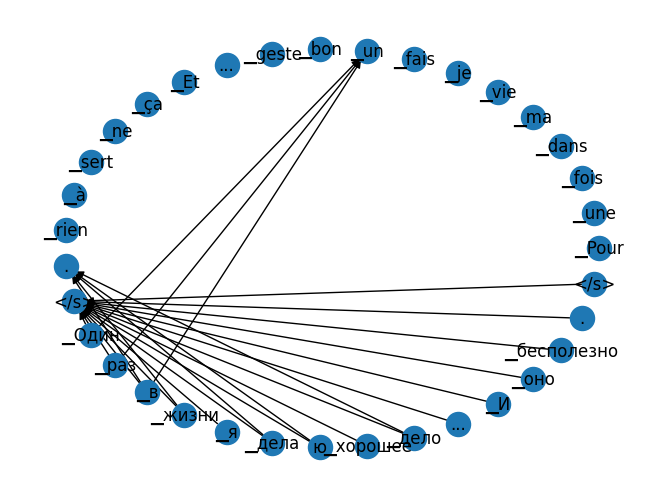

0.1


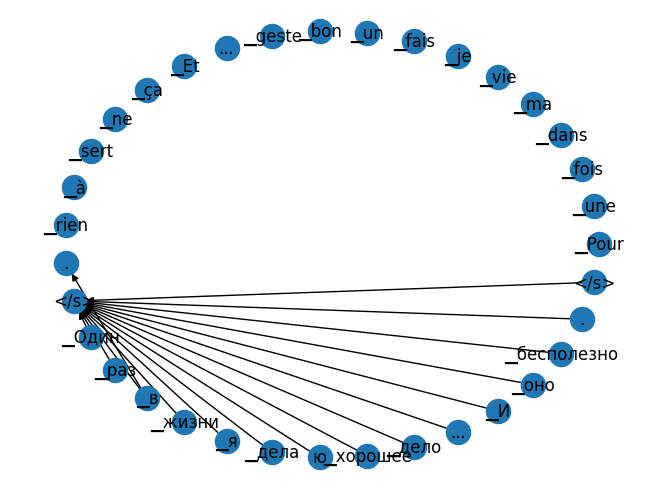

0.25


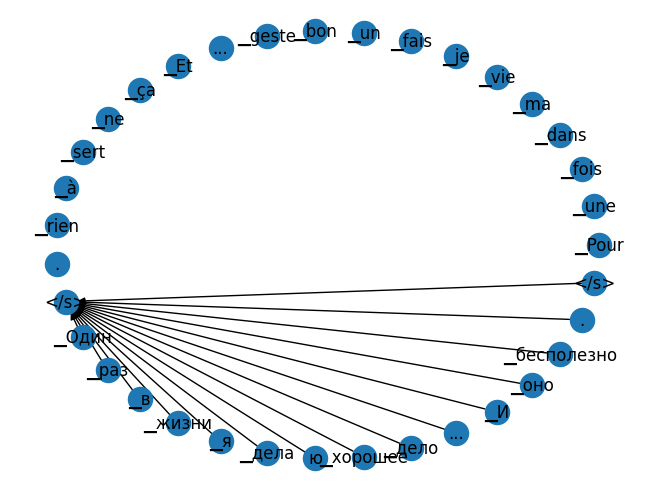

0.5


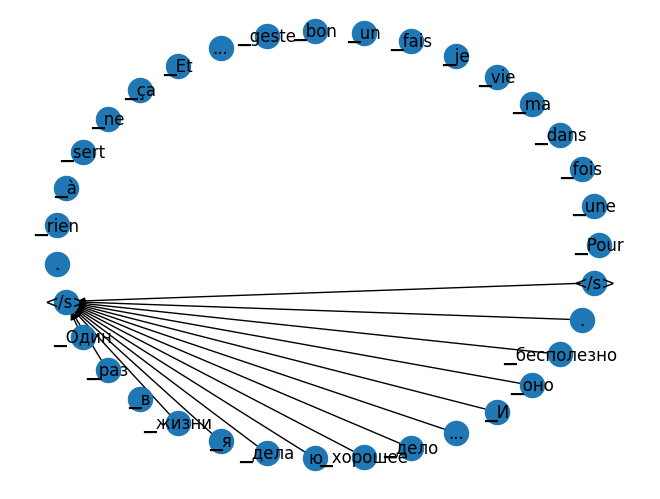

0.75


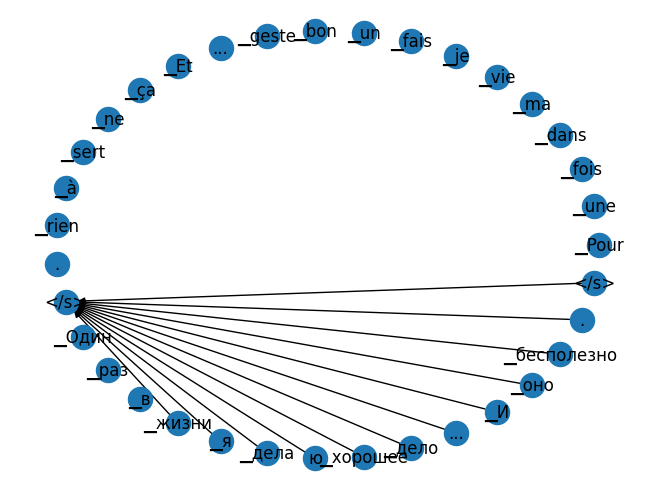

In [ ]:
encoder_input_ids = tokenizer(df['fr'][id], return_tensors="pt", add_special_tokens=True).input_ids
enc_tokens = tokenizer.convert_ids_to_tokens(encoder_input_ids[0])

decoder_input_ids = tokenizer(text_target=df['ru'][id], return_tensors="pt", add_special_tokens=True).input_ids
dec_tokens = tokenizer.convert_ids_to_tokens(decoder_input_ids[0])

ids = torch.cat((encoder_input_ids[0], decoder_input_ids[0]), 0)
tokens = enc_tokens.extend(dec_tokens)

layer_num = 0
head_num = 0 
d = len(encoder_input_ids[0]) + len(decoder_input_ids[0])
mat = np.zeros((d, d))
mat[len(encoder_input_ids[0]):, :len(encoder_input_ids[0])] = outputs.cross_attentions[layer_num].cpu().detach().numpy()[0][head_num]
tokens = tokenizer.convert_ids_to_tokens(ids)
    
vert_to_token = {k: token for k, token in enumerate(tokens)}
vert_to_id = {k: id for k, id in enumerate(ids)}

print(f'layer №{layer_num}, head №{head_num}')

for t in thresholds:
    print(t)
    adj = (mat >= t).astype(int)

    attention_graph = nx.from_numpy_array(adj, create_using=nx.DiGraph)

    nx.set_node_attributes(attention_graph, vert_to_token, name='token')
    nx.set_node_attributes(attention_graph, vert_to_id, name='id')
    my_draw(attention_graph)

In [ ]:
model = MarianMTModel.from_pretrained("Helsinki-NLP/opus-mt-fr-ru")
translated = model.generate(**tokenizer(df['fr'][0], return_tensors="pt", padding=True))

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1346: UserWarning: Using `max_length`'s default (512) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


In [ ]:
sent = df['fr'][0]

In [ ]:
#model.to('cuda')
#model.generate(**tokenizer(sent, return_tensors="pt", padding=True).to('cuda')).cpu().detach().numpy()[0]

In [1]:
'''model.to('cuda')
translated = [model.generate(**tokenizer(sent, return_tensors="pt", padding=True).to('cuda')).cpu().detach().numpy()[0] for sent in df['fr']]
df['ru_opusmt'] = translated

df.to_csv('/content/tatoeba_fr_ru_opus.csv')'''

'model.to(\'cuda\')\ntranslated = [model.generate(**tokenizer(sent, return_tensors="pt", padding=True).to(\'cuda\')).cpu().detach().numpy()[0] for sent in df[\'fr\']]\ndf[\'ru_opusmt\'] = translated\n\ndf.to_csv(\'/content/tatoeba_fr_ru_opus.csv\')'

In [2]:
import pandas as pd

In [3]:
!pip3 install ripserplusplus  #gpu is required

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ripserplusplus: filename=ripserplusplus-1.1.2-cp310-cp310-linux_x86_64.whl size=512069 sha256=2827816d3b61f5bef5e652bcd873c74ca50544da736f595894c075cd59801e69
  Stored in directory: /root/.cache/pip/wheels/23/44/1a/84a78a6462ea7266d1564d82ed5c4d66f893f5d3a74173292f
Successfully built ripserplusplus


In [4]:
#from stats_count import *

In [57]:
import matplotlib.pyplot as plt
import networkx as nx
import torch
from collections import defaultdict
import ripserplusplus as rpp
import pandas as pd
import numpy as np
import itertools

In [58]:
def barcode_pop_inf(barcode):
    """Delete all infinite barcodes"""
    for dim in barcode:
        if len(barcode[dim]):
            barcode[dim] = barcode[dim][barcode[dim]['death'] != np.inf]
    return barcode

def barcode_number(barcode, dim=0, bd='death', ml='m', t=0.5):
    """Calculate number of barcodes in h{dim} with time of birth/death more/less then threshold"""
    if len(barcode[dim]):
        if ml == 'm':
            return np.sum(barcode[dim][bd] >= t)
        elif ml == 'l':
            return np.sum(barcode[dim][bd] <= t)
        else:
            raise Exception("Wrong more/less type in barcode_number calculation")
    else:
        return 0.0
        
def barcode_time(barcode, dim=0, bd='birth'):
    """Calculate time of birth/death in h{dim} of longest barcode"""
    if len(barcode[dim]):
        max_len_idx = np.argmax(barcode[dim]['death'] - barcode[dim]['birth'])
        return barcode[dim][bd][max_len_idx]
    else:
        return 0.0
    
def barcode_number_of_barcodes(barcode, dim=0):
    return len(barcode[dim])

def barcode_entropy(barcode, dim=0):
    if len(barcode[dim]):
        lengths = barcode[dim]['death'] - barcode[dim]['birth']
        lengths /= np.sum(lengths)
        return -np.sum(lengths*np.log(lengths))
    else:
        return 0.0

def barcode_sum(barcode, dim=0):
    """Calculate sum of lengths of barcodes in h{dim}"""
    if len(barcode[dim]):
        return np.sum(barcode[dim]['death'] - barcode[dim]['birth'])
    else:
        return 0.0

def barcode_mean(barcode, dim=0):
    """Calculate mean of lengths of barcodes in h{dim}"""
    if len(barcode[dim]):
        return np.mean(barcode[dim]['death'] - barcode[dim]['birth'])
    else:
        return 0.0

def barcode_std(barcode, dim=0):
    """Calculate std of lengths of barcodes in h{dim}"""
    if len(barcode[dim]):
        return np.std(barcode[dim]['death'] - barcode[dim]['birth'])
    else:
        return 0.0

def count_ripser_features(barcodes, feature_list=['h0_m']):
    """Calculate all provided ripser features"""
    # first pop all infs from barcodes
    barcodes = [barcode_pop_inf(barcode) for barcode in barcodes]
    # calculate features
    features = []
    for feature in feature_list:
        feature = feature.split('_')
        # dimension, feature type and args
        dim, ftype, fargs = int(feature[0][1:]), feature[1], feature[2:]
        if ftype == 's':
            feat = [barcode_sum(barcode, dim) for barcode in barcodes]
        elif ftype == 'm':
            feat = [barcode_mean(barcode, dim) for barcode in barcodes]
        elif ftype == 'v':
            feat = [barcode_std(barcode, dim) for barcode in barcodes]
        elif ftype == 'n':
            bd, ml, t = fargs[0], fargs[1], float(fargs[2][1:])
            if bd == 'b':
                bd = 'birth'
            elif bd == 'd':
                bd = 'death'
            feat = [barcode_number(barcode, dim, bd, ml, t) for barcode in barcodes]
        elif ftype == 't':
            bd = fargs[0]
            if bd == 'b':
                bd = 'birth'
            elif bd == 'd':
                bd = 'death'
            feat = [barcode_time(barcode, dim, bd) for barcode in barcodes]
        elif ftype == 'nb':
            feat = [barcode_number_of_barcodes(barcode, dim) for barcode in barcodes]
        elif ftype == 'e':
            feat = [barcode_entropy(barcode, dim) for barcode in barcodes]
        features.append(feat) 
    return np.swapaxes(np.array(features), 0, 1) # samples X n_features

In [59]:
import time
import itertools
from tqdm import tqdm

def my_draw(G):
    pos = nx.circular_layout(G)
    nx.draw(G, pos)
    node_labels = nx.get_node_attributes(G, 'token')
    nx.draw_networkx_labels(G, pos, labels=node_labels)
    plt.show()

def get_barcodes(orig_col, tr_col, tokenizer, model):
    

    barcodes = {}
    dim = 1
    lower_bound = 1e-3

    bc_feat_names = [
        'h0_s', 
        'h0_e',
        'h0_t_d', 
        'h0_n_d_m_t0.75',
        'h0_n_d_m_t0.5',
        'h0_n_d_l_t0.25',
        'h1_t_b',
        'h1_n_b_m_t0.25',
        'h1_n_b_l_t0.95', 
        'h1_n_b_l_t0.70',  
        'h1_s',
        'h1_e',
        'h1_v',
        'h1_nb'
    ]
    def_feat_names = ['b0', 'b1', 'edge_count', 'str_comp']
    
    thresholds = [0.025, 0.05, 0.1, 0.25, 0.5, 0.75]
    heads = [f'h{i + 1}' for i in range(8)]
    layers = [f'l{i + 1}' for i in range(6)]

    bc_col_names = ['_'.join([f, str(t), h, l]) for l, h, t, f in itertools.product(layers, heads, thresholds, bc_feat_names)]
    def_col_names = ['_'.join([f, str(t), h, l]) for l, h, t, f in itertools.product(layers, heads, thresholds, def_feat_names)] + ['nodes_count']
    dataset = pd.DataFrame(columns=['orig_sent', 'tran_sent'] + def_col_names + bc_col_names)

    for i, sents in tqdm(enumerate(zip(orig_col, tr_col))):
        time.sleep(0.1)
        orig_sent, tr_sent = sents

        encoder_input_ids = tokenizer(orig_sent, return_tensors="pt", add_special_tokens=True).input_ids
        decoder_input_ids = tokenizer(text_target=tr_sent, return_tensors="pt", add_special_tokens=True).input_ids

        outputs = model(input_ids=encoder_input_ids.to('cuda'), decoder_input_ids=decoder_input_ids.to('cuda'))

        encoder_text = tokenizer.convert_ids_to_tokens(encoder_input_ids[0])
        decoder_text = tokenizer.convert_ids_to_tokens(decoder_input_ids[0])

        enc_tokens = tokenizer.convert_ids_to_tokens(encoder_input_ids[0])
        dec_tokens = tokenizer.convert_ids_to_tokens(decoder_input_ids[0])

        ids = torch.cat((encoder_input_ids[0], decoder_input_ids[0]), 0)
        tokens = enc_tokens.extend(dec_tokens)

        layer_num = 0
        head_num = 0
        d = len(encoder_input_ids[0]) + len(decoder_input_ids[0])
        def_feat_list = [orig_sent, tr_sent]
        bc_feat_list = []

        for layer_num in range(6):
            for head_num in range(8):
                ud_mat = np.zeros((d, d))
                d_mat = np.zeros((d, d))
                n, m = len(encoder_input_ids[0]), len(decoder_input_ids[0])
                cross_att = outputs.cross_attentions[layer_num].cpu().detach().numpy()[0][head_num]
                cross_att_squared = cross_att @ cross_att.T
                np.fill_diagonal(cross_att_squared, 0)
                ud_mat[n:, :n] = cross_att
                ud_mat[:n, n:] = cross_att.T
                ud_mat[:n, :n] = outputs.encoder_attentions[layer_num].cpu().detach().numpy()[0][head_num] +\
                            outputs.encoder_attentions[layer_num].cpu().detach().numpy()[0][head_num].T
                ud_mat[n:, n:] = outputs.decoder_attentions[layer_num].cpu().detach().numpy()[0][head_num] +\
                            outputs.decoder_attentions[layer_num].cpu().detach().numpy()[0][head_num].T
                d_mat[n:, :n] = outputs.cross_attentions[layer_num].cpu().detach().numpy()[0][head_num]
                d_mat[:n, :n] = outputs.encoder_attentions[layer_num].cpu().detach().numpy()[0][head_num]
                d_mat[n:, n:] = outputs.decoder_attentions[layer_num].cpu().detach().numpy()[0][head_num]

                nx_d_list = []
                nx_ud_list = []

                for t in thresholds:
                    d_adj = (d_mat >= t).astype(int) # in accordance with direction of attention(encoder, decoder)
                    ud_adj = (ud_mat >= t).astype(int)
                    ud_mat = ud_mat * (ud_mat >= t).astype(int) # fully symetrical
                    
                    ripser_mat = 1 - ud_mat
                    udgraph = nx.from_numpy_array(ud_adj)
                    np.fill_diagonal(ripser_mat, 0)
                    dgraph = nx.from_numpy_array(d_adj, create_using=nx.DiGraph) 

                    #default stats
                    e = udgraph.number_of_edges()
                    n = udgraph.number_of_nodes()
                    c = nx.number_connected_components(udgraph)

                    def_feat_list.append(c)
                    def_feat_list.append(e - n + c)
                    def_feat_list.append(e)
                    def_feat_list.append(nx.number_strongly_connected_components(dgraph))

                    barcodes = rpp.run(f"--format distance --dim {dim}", ripser_mat)
                    feat_arr = count_ripser_features([barcodes], bc_feat_names)[0]
                    bc_feat_list.extend(feat_arr)

        def_feat_list.append(n)
        row_df = pd.DataFrame([def_feat_list + bc_feat_list], columns=dataset.columns)
        dataset = pd.concat([row_df, dataset], ignore_index=True)
        if i == 12000:
            return dataset

In [60]:
# uncomment to generate datasets

'''tokenizer = MarianTokenizer.from_pretrained("Helsinki-NLP/opus-mt-fr-ru")
model = MarianMTModel.from_pretrained("Helsinki-NLP/opus-mt-fr-ru", output_attentions=True).to('cuda')
new_df = get_barcodes(full_df['fr'], full_df['ru'], tokenizer, model)
new_df.to_csv('fr_trueru_10k_full_true.csv')
from google.colab import files

files.download('fr_trueru_10k_full_true.csv')'''

'tokenizer = MarianTokenizer.from_pretrained("Helsinki-NLP/opus-mt-fr-ru")\nmodel = MarianMTModel.from_pretrained("Helsinki-NLP/opus-mt-fr-ru", output_attentions=True).to(\'cuda\')\nnew_df = get_barcodes(full_df[\'fr\'], full_df[\'ru\'], tokenizer, model)\nnew_df.to_csv(\'fr_trueru_10k_full_true.csv\')\nfrom google.colab import files\n\nfiles.download(\'fr_trueru_10k_full_true.csv\')'

In [61]:
# uncomment to generate datasets

'''tokenizer = MarianTokenizer.from_pretrained("Helsinki-NLP/opus-mt-fr-ru")
model = MarianMTModel.from_pretrained("Helsinki-NLP/opus-mt-fr-ru", output_attentions=True).to('cuda')
opus_df = get_barcodes(full_df['fr'], full_df['ru_opusmt'], tokenizer, model)
opus_df.to_csv('fr_opusru_10k_full_bc.csv')
from google.colab import files

files.download('fr_opusru_10k_full_bc.csv')'''

'tokenizer = MarianTokenizer.from_pretrained("Helsinki-NLP/opus-mt-fr-ru")\nmodel = MarianMTModel.from_pretrained("Helsinki-NLP/opus-mt-fr-ru", output_attentions=True).to(\'cuda\')\nopus_df = get_barcodes(full_df[\'fr\'], full_df[\'ru_opusmt\'], tokenizer, model)\nopus_df.to_csv(\'fr_opusru_10k_full_bc.csv\')\nfrom google.colab import files\n\nfiles.download(\'fr_opusru_10k_full_bc.csv\')'

In [62]:
from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


In [63]:
#read already generated datasets
import pandas as pd

full_mt_df = pd.read_csv('/content/drive/MyDrive/tatoeba_fr_ru/fr_opusru_10k_full_bc.csv')
full_true_df = pd.read_csv('/content/drive/MyDrive/tatoeba_fr_ru/fr_trueru_10k_full_true.csv')

In [64]:
full_mt_df['class'] = 0
full_true_df['class'] = 1

In [65]:
merged_df = pd.concat([full_mt_df, full_true_df])

In [66]:
merged_df['class'].sum()

12001

In [67]:
merged_df = merged_df.iloc[np.array([i // 2 if i % 2 == 0 else (i // 2) + (len(merged_df) // 2) for i in range(len(merged_df))])]

In [68]:
merged_df.reset_index()

,index,Unnamed: 0,orig_sent,tran_sent,b0_0.025_h1_l1,b1_0.025_h1_l1,edge_count_0.025_h1_l1,str_comp_0.025_h1_l1,b0_0.05_h1_l1,b1_0.05_h1_l1,...,h0_n_d_l_t0.25_0.75_h8_l6,h1_t_b_0.75_h8_l6,h1_n_b_m_t0.25_0.75_h8_l6,h1_n_b_l_t0.95_0.75_h8_l6,h1_n_b_l_t0.70_0.75_h8_l6,h1_s_0.75_h8_l6,h1_e_0.75_h8_l6,h1_v_0.75_h8_l6,h1_nb_0.75_h8_l6,class
0,0,0,Je n’en peux plus !,Я больше не могу!,1,61,74,7,1,51,...,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0,0,Je n’en peux plus !,Я больше не могу!,1,61,74,7,1,51,...,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,1,1,La radio ne marche pas.,Радио не работает.,1,45,56,6,1,35,...,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,1,1,La radio ne marche pas.,Радио не работает.,1,45,56,6,1,35,...,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,2,2,Allume la radio.,Включи радио.,1,53,65,7,1,43,...,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23997,11998,11998,Je ne supporte pas ce type.,Я не переношу этого типа.,1,85,102,10,1,68,...,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
23998,11999,11999,Lorsqu'il a demandé qui avait cassé la fenêtre...,"Когда он спросил, кто сломал окно, все мальчик...",1,361,404,23,1,277,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
23999,11999,11999,Lorsqu'il a demandé qui avait cassé la fenêtre...,"Когда он спросил, кто разбил окно, все мальчик...",1,338,377,19,1,266,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
24000,12000,12000,Pour une fois dans ma vie je fais un bon geste...,"Однажды в моей жизни я делаю хороший жест, и э...",1,269,306,19,1,212,...,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [69]:
nan_cols = [i for i in merged_df.columns if merged_df[i].isnull().any()]

In [70]:
merged_df.loc[:, nan_cols] = merged_df.loc[:, nan_cols].fillna(np.inf)

In [71]:
from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(merged_df.drop(columns=['orig_sent', 'tran_sent', 'class']), merged_df['class'], test_size=0.33, random_state=42)
X, y = merged_df.reset_index().drop(columns=['Unnamed: 0', 'orig_sent', 'tran_sent', 'class', 'index']), merged_df['class']
X_train, X_test, y_train, y_test = X[:20000], X[20000:], y[:20000], y[20000:]

In [73]:
from collections import defaultdict, Counter
import itertools
import re
import subprocess
import pickle
import json

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
from sklearn import linear_model, preprocessing, utils, datasets
from sklearn.metrics import accuracy_score, matthews_corrcoef
from matplotlib.pyplot import scatter
import random
from tqdm.notebook import tqdm

def pred_by_Xy(X_train, y_train, X_test, classifier, verbose=False, scale=True):

    if scale:
        scaler  = preprocessing.StandardScaler().fit(X_train)
        X_train = scaler.transform(X_train)

    classifier.fit(X_train, y_train)
    
    if verbose:
        print("train matt:", matthews_corrcoef(y_train, classifier.predict(X_train)))
        print("train acc: ", accuracy_score(y_train, classifier.predict(X_train)))
    
    if scale:
        X_test = scaler.transform(X_test)
        
    return classifier.predict(X_test), \
           matthews_corrcoef(y_train, classifier.predict(X_train)), \
           accuracy_score(y_train, classifier.predict(X_train))

In [74]:
X, y = merged_df.reset_index().drop(columns=['Unnamed: 0', 'orig_sent', 'tran_sent', 'class', 'index']+nan_cols), merged_df['class']
X_train, X_test, y_train, y_test = X[:20000], X[20000:], y[:20000], y[20000:]

In [ ]:
import warnings
warnings.filterwarnings('ignore')

solver  = "lbfgs"
classifier = linear_model.LogisticRegression(solver=solver)

# The classifier with concrete hyperparameters values, which you should insert here.
# For grid search of hyperparameters - see below.

C_range = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2]
max_iter_range = [1, 2, 3, 5, 10, 25, 50, 100, 500, 1000, 2000]

matt_scores = dict()
acc_scores  = dict()
matt_scores_train = dict()
acc_scores_train  = dict()
results     = dict()


for C in tqdm(C_range):
    for max_iter in max_iter_range:
        classifier = linear_model.LogisticRegression(penalty='l2', C=C, max_iter=max_iter, dual=False,
                                                     solver=solver)

        result, train_matt, train_acc = pred_by_Xy(X_train, y_train, X_test, classifier)
        results[(C, max_iter)] = result

        matt_scores_train[(C, max_iter)] = matthews_corrcoef(result, y_test)
        acc_scores_train[(C, max_iter)]  = accuracy_score(result, y_test)

        try:
            matt_scores[(C, max_iter)] = matthews_corrcoef(result, y_test)
            acc_scores[(C, max_iter)]  = accuracy_score(result, y_test)
            #print("test matt: ", matthews_corrcoef(result, y_test))
            #print("test acc:  ", accuracy_score(result, y_test))
        except:
            #print("Not labeled")
            pass

try:
    for C in tqdm(C_range):
        for max_iter in max_iter_range:
            print(C, max_iter, ", matt:", matt_scores[(C, max_iter)])
            print(C, max_iter, ", acc :", acc_scores[(C, max_iter)])
            print()
    print("---")
    print()
    print("The best Acc score:")
    print()
    print(max(acc_scores.values()))
    print()
    print("The best Matthew score:")
    print()
    print(max(matt_scores.values()))

except:
    print("Data is not labeled")

In [ ]:
results

In [75]:
import warnings
warnings.filterwarnings('ignore')

solver  = "lbfgs"
C, max_iter = 0.0005, 25 
classifier = linear_model.LogisticRegression(penalty='l2', C=C, max_iter=max_iter, dual=False,
                                                     solver=solver)

result, train_matt, train_acc = pred_by_Xy(X_train, y_train, X_test, classifier)

In [76]:
classifier

LogisticRegression(C=0.0005, max_iter=25)

In [77]:
scaler = preprocessing.StandardScaler().fit(X_train)

np.all(classifier.predict(scaler.transform(X_test)) == result)

True

In [78]:
train_acc

0.63205

In [80]:
np.sum((result == y_test)) / len(y_test) 

0.6029485257371314

In [84]:
from sklearn.inspection import permutation_importance

coefs = classifier.coef_[0]

In [85]:
top = [x[1] for x in sorted(zip(coefs, [i for i in range(len(coefs))]))][:1000]

In [86]:
top_names = [X.columns[x] for x in top]

In [94]:
np.sum([1 if x[:2] == 'h0' or x[:2] == 'b0' else 0 for x in top_names])

267

In [95]:
np.sum([1 if x[:2] == 'h1' or x[:2] == 'b1' else 0 for x in top_names])

668

In [100]:
from collections import Counter

(Counter([x[-5:] for x in top_names]).most_common())

[('h7_l5', 35),
 ('h4_l4', 34),
 ('h8_l4', 33),
 ('h5_l1', 33),
 ('h5_l3', 31),
 ('h3_l1', 30),
 ('h8_l3', 30),
 ('h1_l3', 29),
 ('h1_l4', 29),
 ('h2_l2', 29),
 ('h8_l5', 28),
 ('h4_l6', 27),
 ('h7_l1', 27),
 ('h5_l5', 27),
 ('h6_l1', 26),
 ('h5_l6', 25),
 ('h3_l6', 25),
 ('h3_l5', 23),
 ('h6_l6', 23),
 ('h8_l2', 21),
 ('h1_l5', 21),
 ('h3_l3', 21),
 ('h2_l4', 20),
 ('h7_l6', 20),
 ('h7_l4', 19),
 ('h6_l5', 19),
 ('h1_l2', 19),
 ('h4_l5', 18),
 ('h7_l2', 18),
 ('h7_l3', 18),
 ('h5_l4', 18),
 ('h6_l2', 17),
 ('h2_l5', 17),
 ('h6_l4', 17),
 ('h8_l1', 16),
 ('h1_l1', 16),
 ('h1_l6', 15),
 ('h6_l3', 15),
 ('h4_l2', 14),
 ('h2_l6', 13),
 ('h3_l2', 13),
 ('h2_l3', 12),
 ('h5_l2', 11),
 ('h3_l4', 11),
 ('h4_l3', 10),
 ('h8_l6', 9),
 ('h4_l1', 9),
 ('h2_l1', 9)]

In [92]:
top_names

['b1_0.5_h8_l4',
 'h1_v_0.5_h4_l3',
 'b1_0.75_h7_l5',
 'b1_0.75_h2_l4',
 'h1_v_0.5_h8_l1',
 'b1_0.75_h7_l4',
 'h1_t_b_0.25_h4_l4',
 'h1_s_0.75_h8_l6',
 'b1_0.75_h4_l2',
 'h1_v_0.1_h4_l4',
 'h1_v_0.75_h5_l6',
 'h1_e_0.05_h7_l5',
 'h1_v_0.5_h6_l5',
 'h1_v_0.05_h4_l4',
 'h1_e_0.025_h7_l5',
 'h1_v_0.5_h4_l1',
 'b1_0.75_h8_l4',
 'h1_e_0.1_h7_l5',
 'h1_v_0.025_h4_l4',
 'b1_0.5_h1_l3',
 'b1_0.75_h4_l6',
 'b1_0.5_h5_l3',
 'h1_t_b_0.25_h3_l5',
 'h1_v_0.5_h5_l3',
 'h1_v_0.25_h1_l6',
 'b1_0.75_h6_l2',
 'h0_t_d_0.5_h5_l3',
 'h1_v_0.05_h3_l1',
 'h1_v_0.025_h8_l5',
 'h1_t_b_0.05_h4_l2',
 'h1_v_0.025_h3_l1',
 'h0_t_d_0.25_h4_l5',
 'b1_0.5_h5_l2',
 'edge_count_0.75_h2_l4',
 'h1_t_b_0.25_h2_l4',
 'h1_t_b_0.25_h1_l4',
 'b1_0.75_h6_l6',
 'b1_0.5_h2_l4',
 'edge_count_0.75_h7_l5',
 'h1_e_0.1_h2_l2',
 'h1_e_0.75_h8_l5',
 'h0_t_d_0.5_h2_l5',
 'h1_t_b_0.25_h3_l6',
 'h1_t_b_0.025_h7_l1',
 'h1_s_0.1_h2_l2',
 'b0_0.025_h3_l5',
 'edge_count_0.5_h8_l4',
 'h1_v_0.05_h1_l2',
 'h1_t_b_0.1_h5_l5',
 'h1_t_b_0.25_h6_l4'

In [ ]:
X.columns

In [ ]:
merged_df.reset_index().drop(columns=['Unnamed: 0', 'orig_sent', 'tran_sent', 'class', 'index'])

In [ ]:
clf.save_model('cb_clf_checkpoint1')

In [ ]:
outputs.encoder_attentions[layer_num].cpu().detach().numpy()[0][head_num].shape

In [ ]:
full_df = pd.read_csv('tatoeba_fr_ru_opusmt_fixed.csv').drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])

In [ ]:
exp_df = full_df.iloc[10001:12000]

In [ ]:
exp_df = exp_df.drop_duplicates(subset=['fr'])

In [ ]:
from tqdm import tqdm

def generate_candidates(sent, clf, tokenizer, model, scaler):
    kwargs = {
        "num_beams": 4,
        "do_sample": False,
        "num_beam_groups": 4,
        "num_return_sequences": 4,
        "max_new_tokens": 50,
        "min_length": 3,
        "early_stopping": False,
        "repetition_penalty": 1.1,
        "no_repeat_ngram_size": 3,
        "diversity_penalty": 0.85
    }

    encoder_input_ids = tokenizer(sent, return_tensors="pt", add_special_tokens=True).input_ids.to('cuda')
    candidates = model.generate(
        input_ids=encoder_input_ids,
        **kwargs
    )
    cand_sents = [tokenizer.decode(candidate, skip_special_tokens=True) for candidate in candidates]
    features_to_predict = get_barcodes(pd.Series([sent] * kwargs['num_beams']), pd.Series(cand_sents), tokenizer, model)
    probas = clf.predict_proba(scaler.transform(features_to_predict.drop(columns=['orig_sent', 'tran_sent'])))
    return [tokenizer.decode(candidate, skip_special_tokens=True) for candidate in candidates][np.argmax(probas[:, 1])]

scaler = preprocessing.StandardScaler().fit(X_train)
tokenizer = MarianTokenizer.from_pretrained("Helsinki-NLP/opus-mt-fr-ru")
model = MarianMTModel.from_pretrained("Helsinki-NLP/opus-mt-fr-ru", output_attentions=True).to('cuda')
preds = [generate_candidates(sent, clf, tokenizer, model) for sent in tqdm(exp_df['fr'])]
#generate_candidates(exp_df['fr'][10001], clf, tokenizer, model)

In [ ]:
#exp_df.to_csv('exp.csv')
#from google.colab import files

#files.download('exp2.csv')